### NHANES Data
* [NHANES 2021-2023](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?Cycle=2021-2023)

### Data Used + Links
* [Demographics](https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/DEMO_L.htm)
* [Physical Activity](https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/PAQ_L.htm)
* [Blood Pressure](https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/BPXO_L.htm)
* [Weight](https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/WHQ_L.htm)
* [Vitamin D](https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/VID_L.htm)

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Avoid displaying scientific or exponential notations
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Load data
demographics_df = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/DEMO_L.XPT')

### Question 1: "Is there an association between marital status (married or not married) and education level (bachelor’s degree or higher vs. less than a bachelor’s degree)?"
* Variables: DMDMARTZ (marital status) and DMDEDUC2 (education level). Recode as specified.

In [4]:
# Marital Status - Filter out 77, 99, and NaN
demographics_df = demographics_df[~demographics_df['DMDMARTZ'].isin([77, 99])].dropna(subset=['DMDMARTZ'])

# Education level - Filter out 7, 9, and NaN
demographics_df = demographics_df[~demographics_df['DMDEDUC2'].isin([7, 9])].dropna(subset=['DMDEDUC2'])

In [5]:
# Group certain keys together into one category
marital_category_map = {
    1.0: 'Married',
    2.0: 'Not Married',
    3.0: 'Not Married'
}

edu_lv_category_map = {
    1.0: 'Less than bachelor',
    2.0: 'Less than bachelor',
    3.0: 'Less than bachelor',
    4.0: 'Less than bachelor',
    5.0: 'Bachelor or higher'
}

# Apply mapping
marital = demographics_df['DMDMARTZ'].map(marital_category_map)
edu_lv = demographics_df['DMDEDUC2'].map(edu_lv_category_map)

In [6]:
# Check info, including if any missing values(NaN) left
marital.info()

<class 'pandas.core.series.Series'>
Index: 7772 entries, 0 to 11932
Series name: DMDMARTZ
Non-Null Count  Dtype 
--------------  ----- 
7772 non-null   object
dtypes: object(1)
memory usage: 121.4+ KB


In [7]:
edu_lv.info()

<class 'pandas.core.series.Series'>
Index: 7772 entries, 0 to 11932
Series name: DMDEDUC2
Non-Null Count  Dtype 
--------------  ----- 
7772 non-null   object
dtypes: object(1)
memory usage: 121.4+ KB


In [8]:
# Values are only married and non-married now
marital.unique()

array(['Married', 'Not Married'], dtype=object)

In [9]:
# Values only include edu level (e.g. 7 = "refused", but 7 was filtered out) 
edu_lv.unique()

array(['Bachelor or higher', 'Less than bachelor'], dtype=object)

In [10]:
# Raw count of each marital status and edu level combination
table = pd.crosstab(edu_lv, marital)
table

DMDMARTZ,Married,Not Married
DMDEDUC2,,
Bachelor or higher,1631,990
Less than bachelor,2503,2648


In [11]:
# Shows percentage where sum of ALL cells equals 100%
round(pd.crosstab(edu_lv, marital, normalize=True) * 100, 1)

DMDMARTZ,Married,Not Married
DMDEDUC2,,
Bachelor or higher,21.00,12.70
Less than bachelor,32.20,34.10


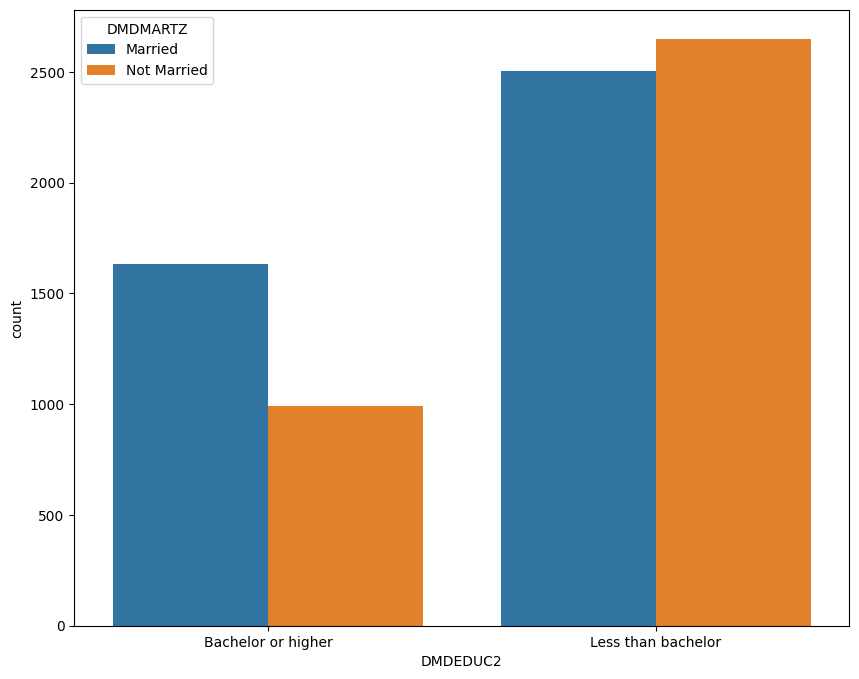

In [12]:
# Show chart of edu_lv vs marital status
plt.figure(figsize=(10,8))
sns.countplot(data=demographics_df, x=edu_lv, hue=marital)
plt.show()

In [13]:
# Prep for chi-square test
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=129.17381826322236, pvalue=6.213197986632679e-30, dof=1, expected_freq=array([[1394.13458569, 1226.86541431],
       [2739.86541431, 2411.13458569]]))

#### ANSWER:

In [14]:
stat, p, dof, expected = stats.chi2_contingency(table)
print(f'stat={stat}, p-value={p}') 
alpha = 0.05 
if p > alpha:
    print('Not statistically significant --> No to little association b/w marital status and education level since p is more than alpha of 0.05')
else:
    print('Statistically significant --> There is an association b/w marital status and education level since p is less than alpha of 0.05')

stat=129.17381826322236, p-value=6.213197986632679e-30
Statistically significant --> There is an association b/w marital status and education level since p is less than alpha of 0.05


### Question 2: "Is there a difference in the mean sedentary behavior time between those who are married and those who are not married?"
* Variables: DMDMARTZ (marital status, recoded) and PAD680 (sedentary behavior time, cleaned).

In [15]:
# Load physical activity data file
phys_activty_df = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/PAQ_L.XPT')

In [16]:
# Sedentary behavior time - Filter out 7777, 9999, and NaN
# NOTE: ~ is a NOT IN operator for pandas
phys_activty_df = phys_activty_df[~phys_activty_df['PAD680'].isin([7777, 9999])].dropna(subset=['PAD680'])

In [17]:
# Get particpant unique identifer (SEQN) and sedentary time
sedentary_time = phys_activty_df[['SEQN', 'PAD680']]

# Convert the SEQN to str (aka object) (this is to prep it for data merging)
sedentary_time['SEQN'] = sedentary_time['SEQN'].astype(str)
sedentary_time.dtypes

/var/folders/ph/yfz6c6l55h3blch0js9k9b440000gn/T/ipykernel_6790/3594872074.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sedentary_time['SEQN'] = sedentary_time['SEQN'].astype(str)


SEQN       object
PAD680    float64
dtype: object

In [18]:
# Get particpant unique identifer and marital status
marital = demographics_df[['SEQN', 'DMDMARTZ']]
marital

,SEQN,DMDMARTZ
0,130378.00,1.00
1,130379.00,1.00
2,130380.00,1.00
6,130384.00,3.00
7,130385.00,1.00
...,...,...
11927,142305.00,2.00
11929,142307.00,3.00
11930,142308.00,1.00
11931,142309.00,2.00


In [19]:
# Combine values 2 and 3 to treat them both as "Not Married"
marital['DMDMARTZ'] = demographics_df['DMDMARTZ'].map(marital_category_map)

/var/folders/ph/yfz6c6l55h3blch0js9k9b440000gn/T/ipykernel_6790/3905854148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marital['DMDMARTZ'] = demographics_df['DMDMARTZ'].map(marital_category_map)


In [20]:
marital['SEQN'] = marital['SEQN'].astype(str)
marital['DMDMARTZ'] = marital['DMDMARTZ'].astype(str)
marital.dtypes

/var/folders/ph/yfz6c6l55h3blch0js9k9b440000gn/T/ipykernel_6790/2471246915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marital['SEQN'] = marital['SEQN'].astype(str)
/var/folders/ph/yfz6c6l55h3blch0js9k9b440000gn/T/ipykernel_6790/2471246915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marital['DMDMARTZ'] = marital['DMDMARTZ'].astype(str)


SEQN        object
DMDMARTZ    object
dtype: object

In [21]:
# Match the unique identifers and merge the marital status and sedentary time data
q2_merge = pd.merge(marital, sedentary_time, how='left', on=['SEQN'])
q2_merge

,SEQN,DMDMARTZ,PAD680
0,130378.0,Married,360.00
1,130379.0,Married,480.00
2,130380.0,Married,240.00
3,130384.0,Not Married,60.00
4,130385.0,Married,180.00
...,...,...,...
7767,142305.0,Not Married,480.00
7768,142307.0,Not Married,480.00
7769,142308.0,Married,600.00
7770,142309.0,Not Married,240.00


In [22]:
# Removing NaN and verify that no NaN exist after
q2_merge = q2_merge.dropna()
q2_merge.isna().sum()

SEQN        0
DMDMARTZ    0
PAD680      0
dtype: int64

In [23]:
# Verify that only desired values remain
q2_merge['DMDMARTZ'].unique()

array(['Married', 'Not Married'], dtype=object)

In [24]:
# Reusuable function to check if desired or undesired values still exist
def check_exist(df, name, valArr):
    remaining_values = df[name].isin(valArr).any()

    if remaining_values:
        return f'There are still rows with the array values in the {name} column.'
    else:
        return f'There are NO rows with the array values in the {name} column.'

In [25]:
check_exist(q2_merge, 'PAD680', [7777, 7777])

'There are NO rows with the array values in the PAD680 column.'

In [26]:
# Verify that both have same amt of data before t-test
print(len(q2_merge['DMDMARTZ']))
print(len(q2_merge['PAD680']))

7699
7699


In [27]:
q2_merge.groupby('DMDMARTZ')['PAD680'].mean() 

DMDMARTZ
Married       353.21
Not Married   371.93
Name: PAD680, dtype: float64

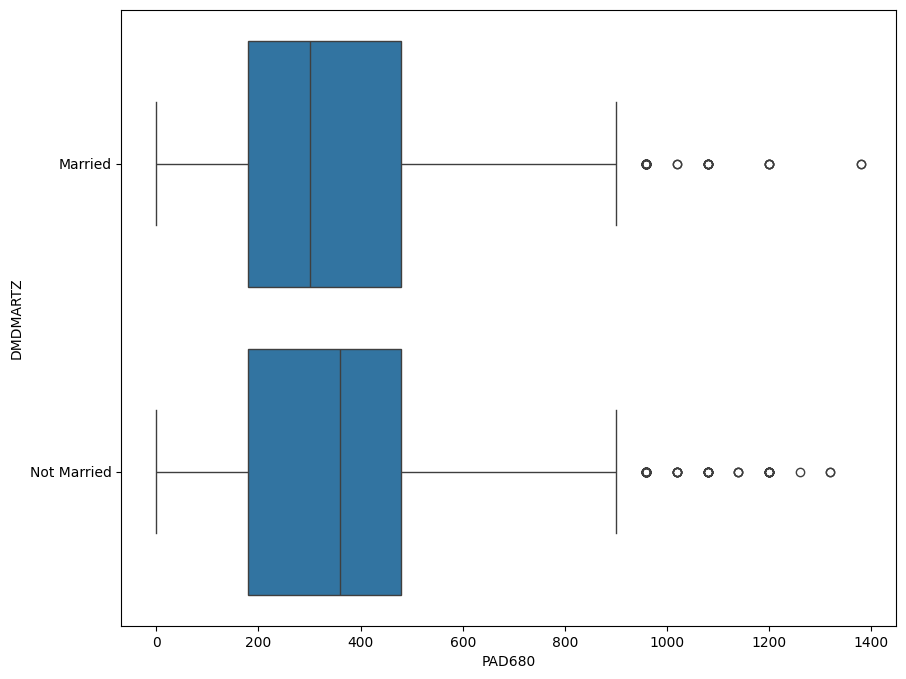

In [28]:
# Create boxplot for variables
plt.figure(figsize=(10,8))
sns.boxplot(data=q2_merge, x='PAD680', y="DMDMARTZ")
plt.show()

In [29]:
# Get sedendary time of married people
married = q2_merge[q2_merge['DMDMARTZ'] == 'Married']['PAD680']
married

0      360.00
1      480.00
2      240.00
4      180.00
5      180.00
        ...  
7761   480.00
7762   120.00
7763    90.00
7769   600.00
7771   360.00
Name: PAD680, Length: 4104, dtype: float64

In [30]:
# Get sedendary time of not married people
not_married = q2_merge[q2_merge['DMDMARTZ'] == 'Not Married']['PAD680']
not_married

3        60.00
6      1200.00
10      240.00
14      360.00
19      960.00
         ...  
7765    120.00
7766    360.00
7767    480.00
7768    480.00
7770    240.00
Name: PAD680, Length: 3595, dtype: float64

#### ANSWER:

In [31]:
# Perform independent/two-sample t-test
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(married, not_married, equal_var=True)
print(f"Independent t-Test Statistic: {stat}, p-value: {p_value}")

# Interpretation
if p_value > 0.05:
    print("No significant difference between the groups since p is more than 0.05")
else:
    print("Significant difference between the groups since p is less than 0.05")

Independent t-Test Statistic: -3.879684833002586, p-value: 0.00010546415929820784
Significant difference between the groups since p is less than 0.05


### Question 3: "How do age and marital status affect systolic blood pressure?"
* Variables: RIDAGEYR (age), DMDMARTZ (marital status, recoded), and BPXOSY3 (systolic blood pressure).

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [33]:
bp_df = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/BPXO_L.XPT')

In [34]:
bp = bp_df[['SEQN', 'BPXOSY3']]
bp['SEQN'] = bp['SEQN'].astype(str)
bp.dtypes

/var/folders/ph/yfz6c6l55h3blch0js9k9b440000gn/T/ipykernel_6790/2918402994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp['SEQN'] = bp['SEQN'].astype(str)


SEQN        object
BPXOSY3    float64
dtype: object

In [35]:
age = demographics_df[['SEQN', 'RIDAGEYR']]
age['SEQN'] = age['SEQN'].astype(str)
age.dtypes

/var/folders/ph/yfz6c6l55h3blch0js9k9b440000gn/T/ipykernel_6790/4012603402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['SEQN'] = age['SEQN'].astype(str)


SEQN         object
RIDAGEYR    float64
dtype: object

In [36]:
marital = demographics_df[['SEQN', 'DMDMARTZ']]

# Combine 2.00 and 3.00 to make 2 be the sole 'Not Married' category
marital['DMDMARTZ'] = marital['DMDMARTZ'].replace({2.00: 2, 3.00: 2})
marital['DMDMARTZ'].unique()

/var/folders/ph/yfz6c6l55h3blch0js9k9b440000gn/T/ipykernel_6790/3067145717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marital['DMDMARTZ'] = marital['DMDMARTZ'].replace({2.00: 2, 3.00: 2})


array([1., 2.])

In [37]:
marital['SEQN'] = marital['SEQN'].astype(str)
marital.dtypes

/var/folders/ph/yfz6c6l55h3blch0js9k9b440000gn/T/ipykernel_6790/2031056716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marital['SEQN'] = marital['SEQN'].astype(str)


SEQN         object
DMDMARTZ    float64
dtype: object

In [38]:
q3_merge = pd.merge(bp, age, how='left', on='SEQN')
q3_merge = pd.merge(q3_merge, marital, how='left', on='SEQN')

In [39]:
q3_merge = q3_merge.dropna()
q3_merge.isna().sum()

SEQN        0
BPXOSY3     0
RIDAGEYR    0
DMDMARTZ    0
dtype: int64

In [40]:
q3_merge

,SEQN,BPXOSY3,RIDAGEYR,DMDMARTZ
0,130378.0,132.00,43.00,1.00
1,130379.0,113.00,66.00,1.00
2,130380.0,104.00,44.00,1.00
3,130386.0,115.00,34.00,1.00
4,130387.0,145.00,68.00,2.00
...,...,...,...,...
7795,142305.0,144.00,76.00,2.00
7797,142307.0,131.00,49.00,2.00
7798,142308.0,112.00,50.00,1.00
7799,142309.0,128.00,40.00,2.00


In [41]:
# Include all variables in the model
y = q3_merge['BPXOSY3']
x = q3_merge[['RIDAGEYR', 'DMDMARTZ']]

print(y)

0      132.00
1      113.00
2      104.00
3      115.00
4      145.00
        ...  
7795   144.00
7797   131.00
7798   112.00
7799   128.00
7800   129.00
Name: BPXOSY3, Length: 5835, dtype: float64


In [42]:
# Perform regression test
import statsmodels.api as sm

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                BPXOSY3   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     452.9
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          1.50e-183
Time:                        21:35:33   Log-Likelihood:                -24844.
No. Observations:                5835   AIC:                         4.969e+04
Df Residuals:                    5832   BIC:                         4.971e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.4686      1.028     96.806      0.0

#### ANSWER:
Both age and marital status are statistically significant since their p-values are less than 0.05 and thus, does affect systolic blood pressure (BP). But given that age's p-value is lower, age is likely to affect systolic BP more strongly than marital status.

### Question 4: "Is there a correlation between self-reported weight and minutes of sedentary behavior?"
* Variables: WHD020 (self-reported weight, cleaned) and PAD680 (sedentary behavior time, cleaned).

In [43]:
weight_df = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/WHQ_L.XPT')

In [44]:
weight_df = weight_df[~weight_df['WHD020'].isin([7777, 9999])].dropna(subset=['WHD020'])

In [45]:
check_exist(weight_df, 'WHD020', [7777, 9999])

'There are NO rows with the array values in the WHD020 column.'

In [46]:
weight = weight_df[['SEQN', 'WHD020']]
weight['SEQN'] = weight['SEQN'].astype(str)
weight.dtypes

/var/folders/ph/yfz6c6l55h3blch0js9k9b440000gn/T/ipykernel_6790/190052248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight['SEQN'] = weight['SEQN'].astype(str)


SEQN       object
WHD020    float64
dtype: object

In [47]:
weight

,SEQN,WHD020
0,130378.0,190.00
1,130379.0,220.00
2,130380.0,150.00
3,130384.0,204.00
4,130385.0,240.00
...,...,...
8496,142305.0,137.00
8497,142307.0,206.00
8498,142308.0,174.00
8499,142309.0,200.00


In [48]:
correlation = pd.merge(weight, sedentary_time, how='left', on='SEQN')
correlation

,SEQN,WHD020,PAD680
0,130378.0,190.00,360.00
1,130379.0,220.00,480.00
2,130380.0,150.00,240.00
3,130384.0,204.00,60.00
4,130385.0,240.00,180.00
...,...,...,...
8353,142305.0,137.00,480.00
8354,142307.0,206.00,480.00
8355,142308.0,174.00,600.00
8356,142309.0,200.00,240.00


In [49]:
# Remove NaN
correlation = correlation.dropna()
correlation.isna().sum()

SEQN      0
WHD020    0
PAD680    0
dtype: int64

In [50]:
from random import sample

## Create two lists of equal values
correlation_weight = list(correlation['WHD020'])
print(sample(correlation_weight, 10))
print('Length of sample cholesterol: ', len(correlation_weight))

correlation_seden_time = list(correlation['PAD680'])
print(sample(correlation_seden_time, 10))
print('Length of sample glycohemo: ', len(correlation_seden_time))

[175.0, 230.0, 180.0, 166.0, 160.0, 180.0, 190.0, 137.0, 204.0, 174.0]
Length of sample cholesterol:  7954
[180.0, 360.0, 300.0, 300.0, 180.0, 240.0, 240.0, 60.0, 480.0, 240.0]
Length of sample glycohemo:  7954


In [51]:
# Run correlation test
from scipy.stats import pearsonr

# Calculate Pearson correlation
corr, p_value = pearsonr(correlation_weight, correlation_seden_time)
print(f'Pearson Correlation Coefficient: {corr}, p-value: {p_value}')

# Interpretation
if p_value > 0.05:
    print('No significant linear relationship.')
else:
    print('Significant linear relationship.')

Pearson Correlation Coefficient: 0.1559714584645021, p-value: 1.6988498386828133e-44
Significant linear relationship.


<Axes: xlabel='PAD680', ylabel='WHD020'>

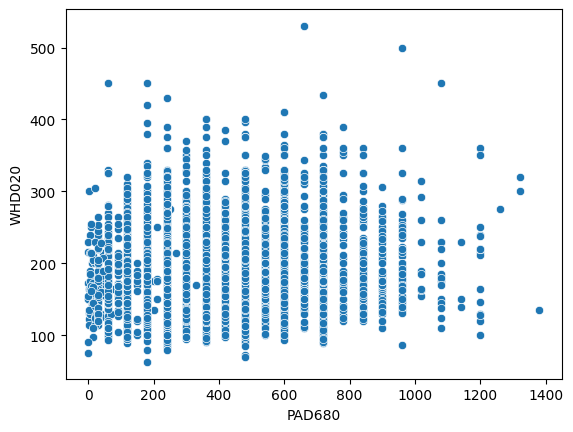

In [52]:
# Create visual
sns.scatterplot(data=correlation, x='PAD680', y='WHD020')

### ANSWER:
There is a statistically significant linear relationship between self-reported weight and minutes of sedentary behavior as the p-value is less than 0.05. However, the correlation between the two variables are weak since the Pearson Correlation Coefficient is only around 0.16.

### Question 5 (Creative Analysis): Is there a difference in the mean sedentary behavior time of those who have adequate vitamin D levels vs those who do not?

In [53]:
vit_d = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/VID_L.XPT')

In [54]:
vit_d = vit_d[['SEQN', 'LBDVD2LC']]
vit_d['SEQN'] = vit_d['SEQN'].astype(str)
vit_d['LBDVD2LC'] = vit_d['LBDVD2LC'].astype(str)
vit_d.dtypes

SEQN        object
LBDVD2LC    object
dtype: object

In [55]:
# Get only 0 (aka 5.397605346934028e-79 here) and 1
listin = ['5.397605346934028e-79', '1.0']
vit_d = vit_d[vit_d['LBDVD2LC'].isin(listin)]
vit_d

,SEQN,LBDVD2LC
0,130378.0,1.0
1,130379.0,1.0
2,130380.0,1.0
5,130386.0,1.0
6,130387.0,1.0
...,...,...
8719,142303.0,5.397605346934028e-79
8721,142305.0,1.0
8723,142307.0,1.0
8725,142309.0,1.0


In [56]:
vit_d['LBDVD2LC'].unique()

array(['1.0', '5.397605346934028e-79'], dtype=object)

In [57]:
vit_d['LBDVD2LC'] = vit_d['LBDVD2LC'].replace('5.397605346934028e-79', 'At or above the detection limit')
vit_d['LBDVD2LC'] = vit_d['LBDVD2LC'].replace('1.0', 'Below lower detection limit')
vit_d['LBDVD2LC'].unique()

array(['Below lower detection limit', 'At or above the detection limit'],
      dtype=object)

In [58]:
vit_d.sample(20)

,SEQN,LBDVD2LC
5468,137895.0,Below lower detection limit
5832,138376.0,Below lower detection limit
7888,141151.0,At or above the detection limit
7250,140303.0,Below lower detection limit
3927,135768.0,At or above the detection limit
5280,137641.0,Below lower detection limit
3928,135769.0,Below lower detection limit
5574,138036.0,At or above the detection limit
8304,141728.0,At or above the detection limit
3143,134679.0,Below lower detection limit


In [59]:
q5_merged = pd.merge(vit_d, sedentary_time, how="left", on=["SEQN"])

In [60]:
# Remove missing values
q5_merged = q5_merged.dropna()
q5_merged.isna().sum()

SEQN        0
LBDVD2LC    0
PAD680      0
dtype: int64

In [61]:
q5_merged

,SEQN,LBDVD2LC,PAD680
0,130378.0,Below lower detection limit,360.00
1,130379.0,Below lower detection limit,480.00
2,130380.0,Below lower detection limit,240.00
3,130386.0,Below lower detection limit,180.00
4,130387.0,Below lower detection limit,1200.00
...,...,...,...
7302,142303.0,At or above the detection limit,360.00
7303,142305.0,Below lower detection limit,480.00
7304,142307.0,Below lower detection limit,480.00
7305,142309.0,Below lower detection limit,240.00


In [62]:
# Get sedentary time from adequate vit D level individuals
adequate_d = q5_merged[q5_merged['LBDVD2LC'] == 'At or above the detection limit']
adequate_d = adequate_d[['PAD680']]

# Convert to list
adequate_d_list = list(adequate_d['PAD680'])
adequate_d_list[:10]

[360.0, 840.0, 300.0, 180.0, 720.0, 30.0, 180.0, 780.0, 360.0, 180.0]

In [63]:
lacking_d = q5_merged[q5_merged['LBDVD2LC'] == 'Below lower detection limit']
lacking_d = lacking_d[['PAD680']]
lacking_d_list = list(lacking_d['PAD680'])
lacking_d_list[:10]

[360.0, 480.0, 240.0, 180.0, 1200.0, 300.0, 240.0, 300.0, 720.0, 420.0]

In [64]:
print(len(adequate_d_list))
print(len(lacking_d_list))

1286
4497


In [65]:
# Make lacking_d_list be same length as adequate_d_list
lacking_d_list = lacking_d_list[:len(adequate_d_list)]

print('Length of adequate vit D list: ', len(adequate_d_list))
print('Length of lacking vit D list: ', len(lacking_d_list))

Length of adequate vit D list:  1286
Length of lacking vit D list:  1286


In [66]:
# Perform paired t-test
from scipy.stats import ttest_rel


stat, p_value = ttest_rel(adequate_d_list, lacking_d_list)
print(f"Paired t-Test Statistic: {stat}, p-value: {p_value}")

# Interpretation
if p_value > 0.05:
    print("No significant difference between the two conditions.")
else:
    print("Significant difference between the two conditions.")

Paired t-Test Statistic: 1.6788444964421902, p-value: 0.09342547827929983
No significant difference between the two conditions.


In [67]:
# Average sedentary time b/w vitamin D groups
import numpy as np

mean_seden_adequate_d = np.mean(adequate_d_list)
mean_seden_lacking_d = np.mean(lacking_d_list)

print(f'Mean sedentary time of those w/ adequate vit D: {mean_seden_adequate_d}')
print(f'Mean sedentary time of those lacking vit D: {mean_seden_lacking_d}')

Mean sedentary time of those w/ adequate vit D: 373.4774494556765
Mean sedentary time of those lacking vit D: 359.66951788491446


### ANSWER:
Since the p-value is greater than 0.05, that indicates there is no significant difference in sedentary time between those who have and do not have adequate vitamin D level. Those with adequate vitamin D level have a higher mean sedentary time, but the difference is very minimal. The mean sedentary time of those with adequate vitamin D is about 373.48 min while those lacking vitamin D is about 359.67 min; the difference is only less than 15 min.